In [1]:
import sys
sys.path.append("..")
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from module.EnhancedDataGenerator import MultiDataGenerator, DefenseDataGenerator
from module.utils_tf import * 
from module.utils import * 
import tensorflow as tf
import time

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = 299
BATCH_SIZE = 10
LABEL_SIZE = 110
VALIDATION_SPLIT = 0.1
sources = {
    'good':{
        'directory': '../../official_data/prepared_train_data/good/',
        'shuffle_num': 100,
    },
    'bad':{
        'directory': '../../official_data/prepared_train_data/bad/',
        'shuffle_num': 30,
    },
    'adv':{
        'directory': '../../official_data/prepared_train_data/adv/',
        'shuffle_num': 10,
    },
}
MDG = MultiDataGenerator(sources, 
                    msb_max=32, msb_rate=0.1, 
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    validation_split=VALIDATION_SPLIT)

In [3]:
train_flow = MDG.get_train_flow(target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)
valid_flow = MDG.get_valid_flow(target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 88190 images belonging to 110 classes.
Found 4923 images belonging to 110 classes.
Found 24 images belonging to 110 classes.
shuffle_status:  good: 88.2, bad: 16.4, adv: 0.3, 
Found 9744 images belonging to 110 classes.
Found 493 images belonging to 110 classes.
Found 0 images belonging to 110 classes.


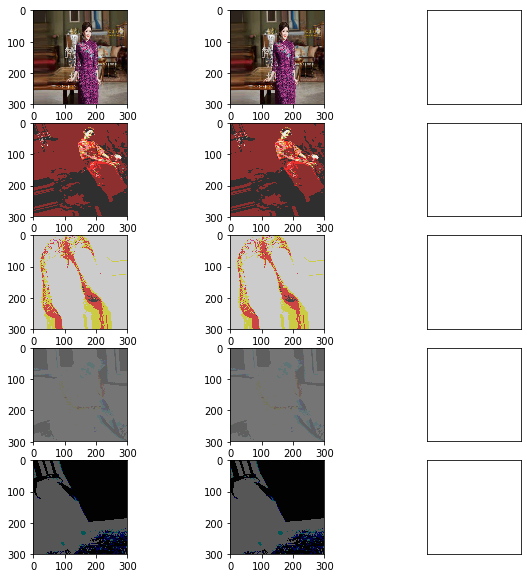

In [11]:
X,Y = next(train_flow)
plot_images(X,X,10)

In [1]:
(88190+4923)*(10/9)

103458.88888888889